# Setup

In [1]:
from google.cloud import bigquery
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../../gcp_credentials.json'
client = bigquery.Client()

# Query

In [3]:
query = """
    SELECT *
    FROM `opensource-observer.oso_playground.code_metrics_by_project`
    ORDER BY last_commit_date DESC
"""
results = client.query(query)

# Transform

In [4]:
df = results.to_dataframe()
df.head()

,project_id,project_name,source,first_commit_date,last_commit_date,repositories,stars,forks,contributors,contributors_6_months,new_contributors_6_months,avg_fulltime_devs_6_months,avg_active_devs_6_months,commits_6_months,issues_opened_6_months,issues_closed_6_months,pull_requests_opened_6_months,pull_requests_merged_6_months
0,6lg5zQJ4GYDjvO5NvVAfPBWuxNgOeEcLAfcL01ws5Us=,DefiLlama,GITHUB,2024-02-23 04:56:58+00:00,2024-02-26 06:59:50+00:00,49,1959,8295,22.0,22.0,22.0,0.666667,1.500000,113.0,1.0,NaN,54.0,39.0
1,xGlgorYroSBvnL8aSeh_jNsdOZD7vyPX6kJRv5tIQPk=,OpenSea,GITHUB,2024-02-24 01:16:48+00:00,2024-02-26 06:59:45+00:00,42,8694,3942,2.0,2.0,2.0,0.000000,0.333333,9.0,1.0,NaN,9.0,6.0
2,LOZXloZfVxGx7h5Na3R-5RcR86-mMDDJuKiE4q_hJOY=,Metamask,GITHUB,2024-02-23 02:48:04+00:00,2024-02-26 06:59:33+00:00,198,23363,13766,43.0,43.0,43.0,0.333333,3.833333,1810.0,50.0,32.0,1799.0,1777.0
3,m-ayiyYXbU1nR5aCLuliEKsYRca6b_8aNzdBbKn56pM=,heyxyz,GITHUB,2024-02-23 06:17:38+00:00,2024-02-26 06:58:08+00:00,2,22083,1404,1.0,1.0,1.0,0.166667,0.166667,48.0,NaN,NaN,7.0,6.0
4,tKGE1lmK7CYkbKfL8IifnzVhGqbY45uJr7gqxVMIisA=,XP Network,GITHUB,2024-02-26 06:56:51+00:00,2024-02-26 06:56:51+00:00,132,86,73,1.0,1.0,1.0,0.000000,0.166667,2.0,NaN,NaN,NaN,1.0


In [5]:
dff = df[(df['forks']>0) & (df['stars']>0)].copy()
dff['recent_activity'] = dff['commits_6_months'] > 0

Text(0.0, 1.0, 'Ratio of stars to forks by project')

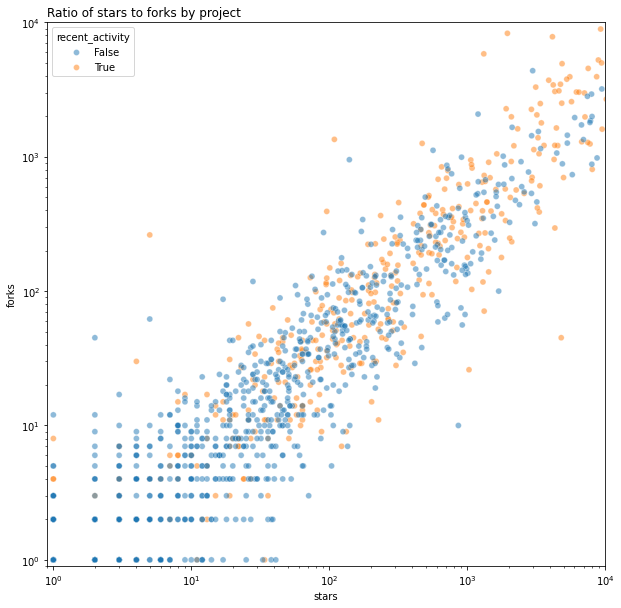

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(
    data=dff, 
    x='stars', 
    y='forks', 
    hue='recent_activity', 
    alpha=.5,
    ax=ax
)
ax.set(
    xscale='log',
    yscale='log',
    xlim=(.9,10_000),
    ylim=(.9,10_000)
)
ax.set_title("Ratio of stars to forks by project", loc='left')

In [7]:
dff['stars_to_forks_ratio'] = dff['stars'] / dff['forks']
avg = dff['stars_to_forks_ratio'].mean()
dff['stadium_projects'] = dff['stars_to_forks_ratio'] >= avg
print(avg)

3.5065430504992983


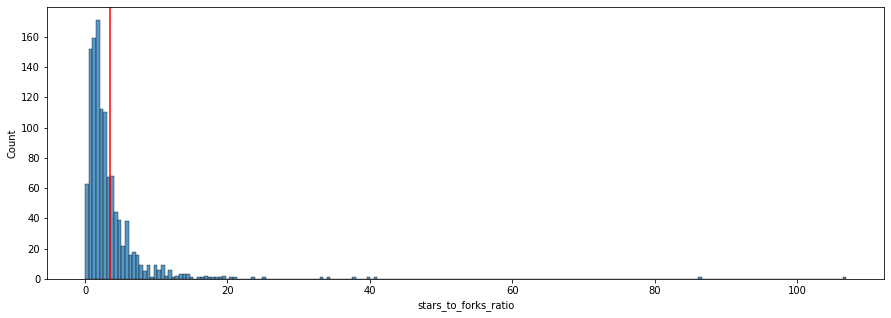

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(dff['stars_to_forks_ratio'], ax=ax)
ax.axvline(avg, color='red')

In [9]:
pd.crosstab(dff['recent_activity'], dff['stadium_projects'])

stadium_projects,False,True
recent_activity,,
False,552,246
True,277,110


In [10]:
dff[dff['stadium_projects'] == True].sort_values(by='stars', ascending=False).head()

,project_id,project_name,source,first_commit_date,last_commit_date,repositories,stars,forks,contributors,contributors_6_months,...,avg_fulltime_devs_6_months,avg_active_devs_6_months,commits_6_months,issues_opened_6_months,issues_closed_6_months,pull_requests_opened_6_months,pull_requests_merged_6_months,recent_activity,stars_to_forks_ratio,stadium_projects
84,_-S_4OPQhIH4TID_hmmAA5OXTOHKI4iN4pvDgt3elQk=,IPFS,GITHUB,2024-02-23 11:15:22+00:00,2024-02-26 00:14:45+00:00,554,87917,17557,14.0,14.0,...,0.166667,1.833333,58.0,8.0,1.0,38.0,22.0,True,5.007518,True
205,GUsvjzu8DgW1_QesFxUUjTyqKf5Zz-wjZKVRmzZEeX4=,Trail of Bits Security Reviews,GITHUB,2024-02-23 10:57:24+00:00,2024-02-24 20:44:31+00:00,171,52279,5425,6.0,6.0,...,0.000000,0.833333,29.0,2.0,NaN,24.0,9.0,True,9.636682,True
332,EE95QJzH3TeDPYao7N4LrVUwFBg4Qyb2dN9fafE7NVE=,Solidity,GITHUB,2024-02-23 16:49:05+00:00,2024-02-23 16:49:05+00:00,1,43828,10818,1.0,1.0,...,0.000000,0.166667,5.0,1.0,NaN,NaN,1.0,True,4.051396,True
10,DIFwzDKrLDsrfbdzXMd0V-K852SAS7sR0loKq0bIlco=,libp2p,GITHUB,2024-02-23 02:46:38+00:00,2024-02-26 06:46:34+00:00,243,23668,6113,5.0,5.0,...,0.166667,0.666667,148.0,3.0,1.0,8.0,3.0,True,3.871749,True
3,m-ayiyYXbU1nR5aCLuliEKsYRca6b_8aNzdBbKn56pM=,heyxyz,GITHUB,2024-02-23 06:17:38+00:00,2024-02-26 06:58:08+00:00,2,22083,1404,1.0,1.0,...,0.166667,0.166667,48.0,NaN,NaN,7.0,6.0,True,15.728632,True


# Export

In [11]:
dff.to_csv('code_metrics.csv', index=False)